In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import prepare
import acquire

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different max_depth value.

Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?

In [2]:
df = prepare.prep_titanic()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [4]:
df.sex = df.sex.map({'male': 1, 'female': 0}).astype(int)

In [5]:
train, validate, test = prepare.split_data(df, 'survived')

In [6]:
train.shape, validate.shape, test.shape

((534, 12), (178, 12), (179, 12))

In [7]:
train.survived.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [8]:
# baseline prediction = did not survive

baseline = len(train[train.survived == 0]) / len(train)
baseline

0.6161048689138576

In [9]:
model1 = DecisionTreeClassifier(max_depth=2)

In [10]:
X_col = ['pclass', 'alone', 'sex']
y_col = 'survived'

In [11]:
X_train, y_train = train[X_col], train[y_col]
X_validate, y_validate = validate[X_col], validate[y_col]

In [12]:
X_train.head()

,pclass,alone,sex
782,1,1,1
643,3,1,1
815,1,1,1
633,1,1,1
411,3,1,1


In [13]:
model1.fit(X_train, y_train)
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 76.40%
validate score: 82.02%


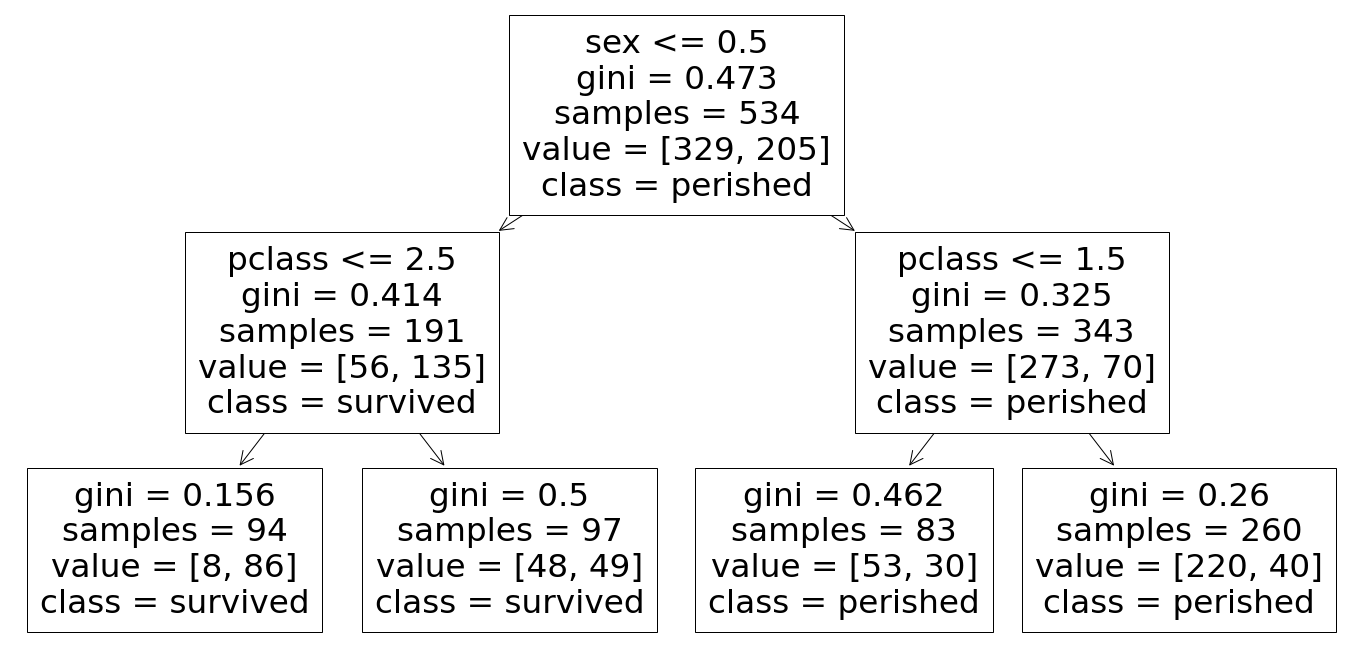

In [14]:
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train.columns.to_list(), class_names=['perished', 'survived']);

In [15]:
model2 = DecisionTreeClassifier(max_depth=2)
X_col2 = ['pclass', 'fare', 'parch']
y_col2 = 'survived'

In [16]:
X_train2, y_train2 = train[X_col2], train[y_col2]
X_validate2, y_validate2 = validate[X_col2], validate[y_col2]

In [17]:
model2.fit(X_train2, y_train2)
print(f'training score: {model2.score(X_train2, y_train2):.2%}')
print(f'validate score: {model2.score(X_validate2, y_validate2):.2%}')

training score: 66.67%
validate score: 69.66%


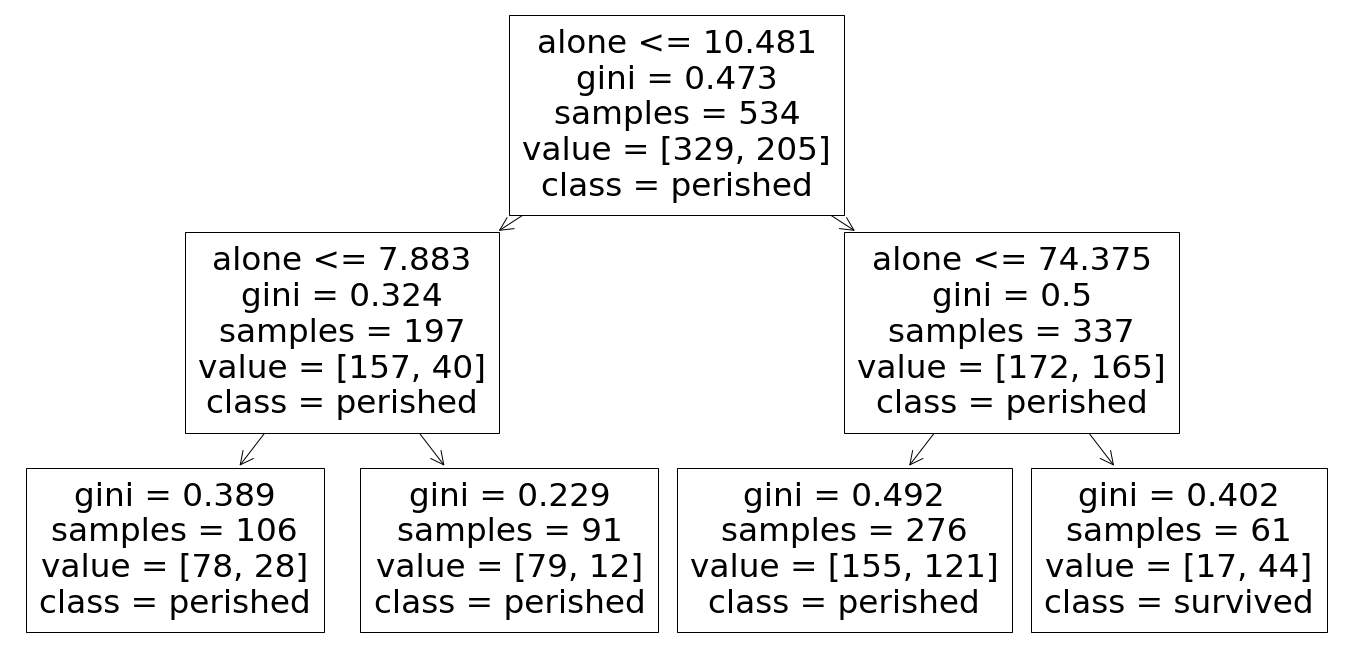

In [18]:
plt.figure(figsize=(24,12))
plot_tree(model2, feature_names=X_train.columns.to_list(), class_names=['perished', 'survived']);

In [20]:
y_preds = pd.DataFrame(
{
    'y_actual': y_validate.values,
    'baseline': 0,
    'model_1': model1.predict(X_validate[X_col]),
    'model_2': model2.predict(X_validate2[X_col2]),
})

In [21]:
pd.DataFrame(classification_report(y_preds.y_actual, y_preds.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.848214,0.772727,0.820225,0.810471,0.819377
recall,0.863636,0.750000,0.820225,0.806818,0.820225
f1-score,0.855856,0.761194,0.820225,0.808525,0.819693
support,110.000000,68.000000,0.820225,178.000000,178.000000


In [22]:
y_preds.head()

,y_actual,baseline,model_1,model_2
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,1,1
4,0,0,0,0


In [23]:
(y_preds.y_actual == y_preds.baseline).mean()

0.6179775280898876

In [24]:
pd.DataFrame(classification_report(y_preds.y_actual, y_preds.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.848214,0.772727,0.820225,0.810471,0.819377
recall,0.863636,0.750000,0.820225,0.806818,0.820225
f1-score,0.855856,0.761194,0.820225,0.808525,0.819693
support,110.000000,68.000000,0.820225,178.000000,178.000000


In [25]:
pd.DataFrame(classification_report(y_preds.y_actual, y_preds.model_2, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.677215,0.850000,0.696629,0.763608,0.743223
recall,0.972727,0.250000,0.696629,0.611364,0.696629
f1-score,0.798507,0.386364,0.696629,0.592436,0.641059
support,110.000000,68.000000,0.696629,178.000000,178.000000


Work through these same exercises using the Telco dataset.

In [4]:
telco = prepare.prep_telco()

/Users/dashiellbringhurst/codeup-data-science/classification-exercises/prepare.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  telco['payment_type'] = telco.payment_type.str.replace('(','').str.replace(')', '').str.replace('Bank transfer automatic', 'auto').str.replace('Credit card automatic', 'auto')
/Users/dashiellbringhurst/codeup-data-science/classification-exercises/prepare.py:42: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  telco['total_charges'] = telco.total_charges.str.replace('$','').str.replace(',','').str.replace(' ','').fillna(0)


In [5]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,0,0,1,1,9,1,...,Yes,Yes,No,1,65.6,593.30,0,One year,DSL,manual
1,2,1,1,0003-MKNFE,1,0,0,0,9,1,...,No,No,Yes,0,59.9,542.40,0,Month-to-month,DSL,manual
2,1,2,1,0004-TLHLJ,1,0,0,0,4,1,...,No,No,No,1,73.9,280.85,1,Month-to-month,Fiber optic,manual
3,1,2,1,0011-IGKFF,1,1,1,0,13,1,...,No,Yes,Yes,1,98.0,1237.85,1,Month-to-month,Fiber optic,manual
4,2,2,1,0013-EXCHZ,0,1,1,0,3,1,...,Yes,Yes,No,1,83.9,267.40,1,Month-to-month,Fiber optic,manual


In [6]:
train_telco, validate_telco, test_telco = prepare.split_data(telco, 'churn')

In [7]:
train_telco.shape, validate_telco.shape, test_telco.shape

((4225, 24), (1409, 24), (1409, 24))

In [8]:
train_telco.churn.value_counts()

0    3104
1    1121
Name: churn, dtype: int64

In [11]:
telco_baseline = len(train_telco[train_telco.churn == 0]) / len(train_telco)
telco_baseline

0.7346745562130178

In [12]:
telco_model1 = DecisionTreeClassifier(max_depth=3)

In [13]:
X_telco = ['contract_type_id', 'tenure', 'monthly_charges']
y_telco = 'churn'

In [14]:
X_train_telco, y_train_telco = train_telco[X_telco], train_telco[y_telco]
X_validate_telco, y_validate_telco = validate_telco[X_telco], validate_telco[y_telco]

In [15]:
X_train_telco.head()

,contract_type_id,tenure,monthly_charges
621,3,61,80.80
2607,1,1,19.75
6443,1,1,20.30
409,2,45,78.75
4058,3,65,99.05


In [17]:
telco_model1.fit(X_train_telco, y_train_telco)
print(f'training score: {telco_model1.score(X_train_telco, y_train_telco):.2%}')
print(f'validate score: {telco_model1.score(X_validate_telco, y_validate_telco):.2%}')

training score: 78.70%
validate score: 79.13%


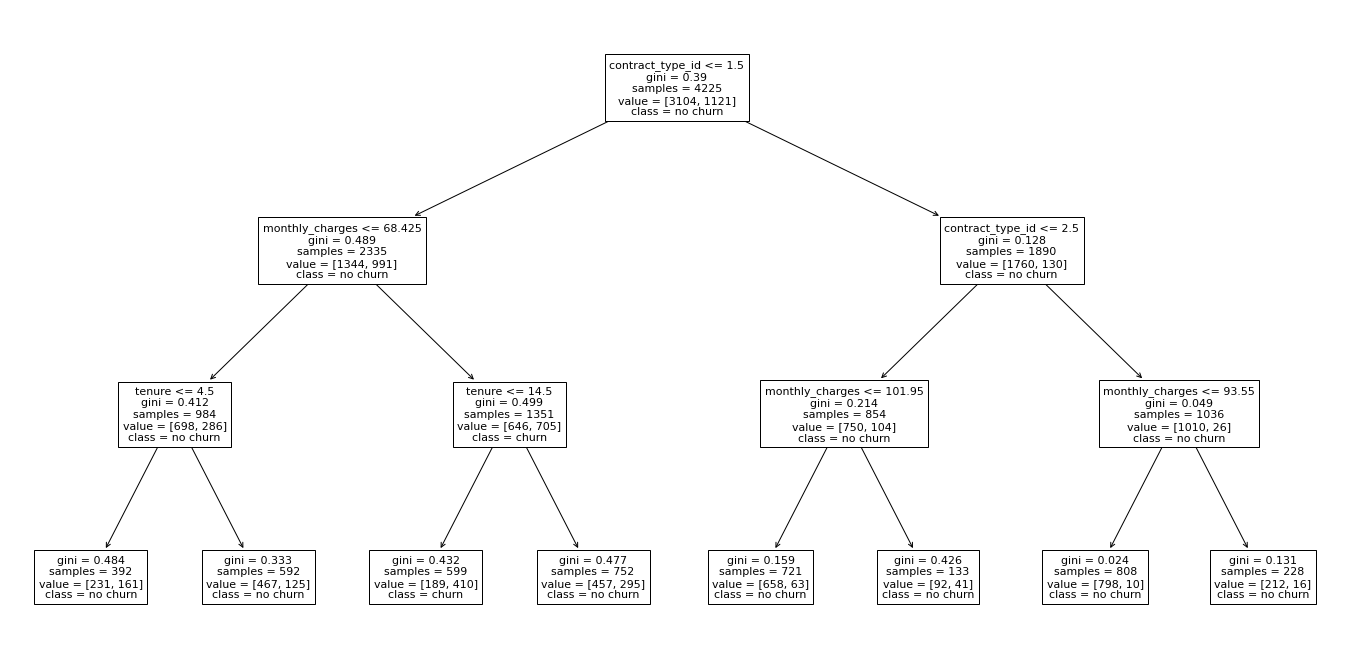

In [18]:
plt.figure(figsize=(24,12))
plot_tree(telco_model1, feature_names=X_train_telco.columns.to_list(), class_names=['no churn', 'churn']);

In [19]:
telco_model2 = DecisionTreeClassifier(max_depth=3)
X_telco2 = ['tenure', 'internet_service_type_id', 'dependents']
y_telco2 = 'churn'

In [20]:
X_train_telco2, y_train_telco2 = train_telco[X_telco2], train_telco[y_telco2]
X_validate_telco2, y_validate_telco2 = validate_telco[X_telco2], validate_telco[y_telco2]

In [21]:
X_train_telco2.head()

,tenure,internet_service_type_id,dependents
621,61,1,0
2607,1,3,0
6443,1,3,0
409,45,1,1
4058,65,2,1


In [22]:
telco_model2.fit(X_train_telco2, y_train_telco2)
print(f'training score: {telco_model2.score(X_train_telco2, y_train_telco2):.2%}')
print(f'validate score: {telco_model2.score(X_validate_telco2, y_validate_telco2):.2%}')

training score: 78.60%
validate score: 79.77%


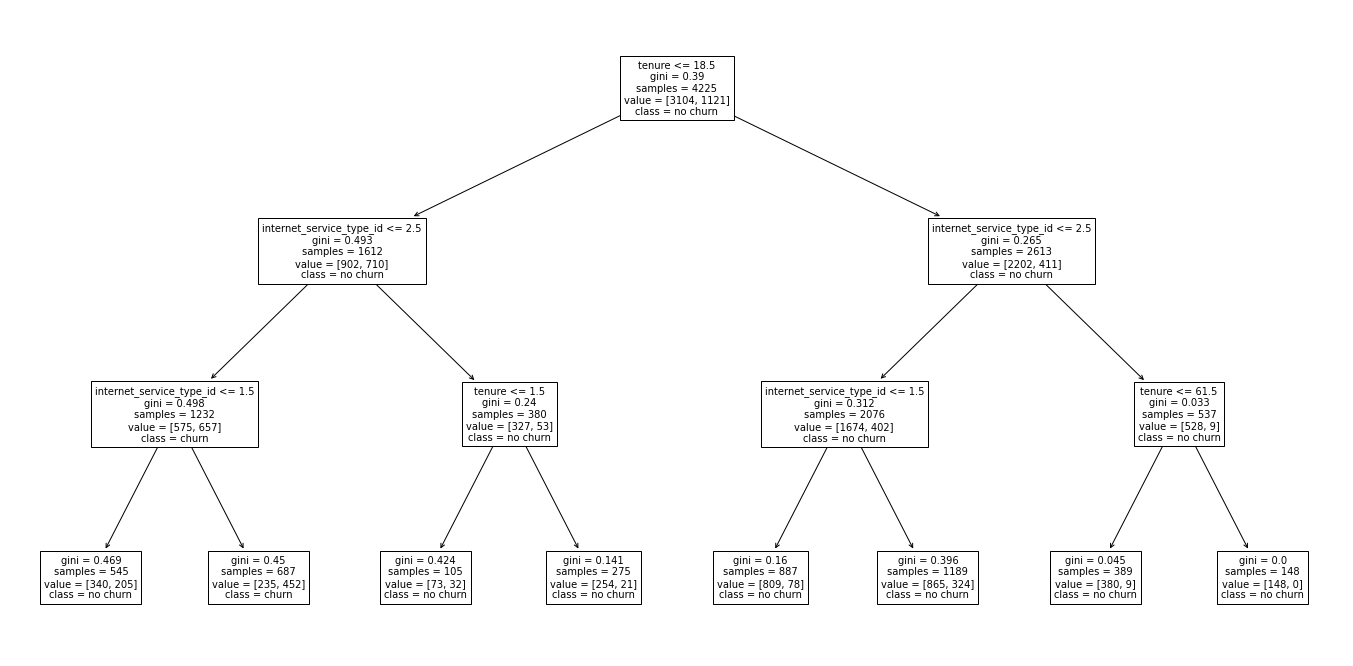

In [23]:
plt.figure(figsize=(24,12))
plot_tree(telco_model2, feature_names=X_train_telco2.columns.to_list(), class_names=['no churn', 'churn']);

In [26]:
y_preds_telco = pd.DataFrame(
{
    'y_actual': y_validate_telco.values,
    'baseline': 0,
    'model_1': telco_model1.predict(X_validate_telco[X_telco]),
    'model_2': telco_model2.predict(X_validate_telco2[X_telco2]),
})

In [29]:
y_preds_telco.head()

,y_actual,baseline,model_1,model_2
0,0,0,0,0
1,0,0,0,0
2,0,0,1,1
3,0,0,0,0
4,0,0,0,0


In [28]:
pd.DataFrame(classification_report(y_preds_telco.y_actual, y_preds_telco.model_1, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.809524,0.688679,0.791341,0.749102,0.777447
recall,0.936232,0.390374,0.791341,0.663303,0.791341
f1-score,0.868280,0.498294,0.791341,0.683287,0.770072
support,1035.000000,374.000000,0.791341,1409.000000,1409.000000


In [30]:
(y_preds_telco.y_actual == y_preds_telco.baseline).mean()

0.7345635202271115

In [31]:
pd.DataFrame(classification_report(y_preds_telco.y_actual, y_preds_telco.model_2, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.822165,0.681633,0.797729,0.751899,0.784863
recall,0.924638,0.446524,0.797729,0.685581,0.797729
f1-score,0.870396,0.539580,0.797729,0.704988,0.782585
support,1035.000000,374.000000,0.797729,1409.000000,1409.000000


Experiment with this model on other datasets with a higher number of output classes.